<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter03_4_Going_Beyond_the_Basics_Detecting_Features_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Going Beyond the Basics: Detecting Features in Images

Hi, chào mọi người. Như trên tựa đề đã ghi, ở chương này, tụi mình sẽ đi xa hơn nữa, hơn cả mức cơ bản. Tìm hiểu sâu hơn với khái niệm mới trong mạng thần kinh.

<img src="https://gregorygundersen.com/image/cnns/41847277995.png" alt="Description" style="width:30%;">

Chương này khá dài nên mình sẽ tổng quan trước những cái mới mà chúng mình sẽ học nha:

1. Cách sử dụng **phương pháp tích chập** để trích xuất các **đặc trưng** trong ảnh. Thông qua đó, ta hiểu được cách sử dụng các **lớp tích chập (Convolution layer)** để tăng hiệu quả học các bức ảnh. Thêm đó là phần **lớp gộp (Pooling layer)** giúp giảm thiểu số lượng tính toán, tuy nhiên vẫn giữ được các đặc trưng chính.
2. Phương pháp **gia tăng thêm dữ liệu (augmentation)** giúp làm giàu kho dữ liệu hơn, tăng dữ liệu trong quá trình huấn luyện giúp cải thiện mô hình.
3. Phương pháp **học chuyển giao (transfer learning)** giúp mô hình có thể tận dụng lại những kiến thức đã học được trước đó.
4. Ngoài ra, chúng mình cũng sẽ ôn lại về **phân loại đa lớp (multi-class classification)** cũng như tìm hiểu sơ qua về phương pháp **loại bỏ ngẫu nhiên (dropout)** giúp cải thiện mô hình, tránh được tình trạng **quá khớp (overfitting)**.

*Lưu ý: Khuyến khích mọi người sử dụng Colab, hãy chuyển sang T4 GPU ở chương này nha vì việc huấn luyện mô hình sử dụng các lớp tích chập tốn khá nhiều thời gian tính toán.*

# 4. Ôn tập về **phân loại đa lớp (multi-class classification)** và tìm hiểu về cơ chế **loại bỏ ngẫu nhiên (dropout)**

Nếu mọi người nhớ lại thì thật ra tụi mình đã từng làm bài toán phân loại đa lớp ở chương 2 với bộ dữ liệu [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) rồi đó. Nếu mọi người chưa xem thì có thể nhấp vào [Chương 2](https://github.com/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter2_Introduction_to_Computer_Vision.ipynb) để tìm hiểu thêm nha. Hiểu đơn giản là thay vì xác định 2 đối tượng (phân loại nhị phân), giờ đây chúng ta sẽ xác định nhiều đối tượng hơn.

Chính vì sự khác biệt ấy nên khi xây dựng mô hình, tụi mình cũng có một vài thay đổi quan trọng. Đây là điểm mấu chốt cần nắm nha:

- Với bài toán **phân loại nhị phân (binary classification)**, lớp tuyến tính cuối cùng hoặc lớp kết nối đầy đủ có:
  - **Số đơn vị đầu ra là 1**, với hàm kích hoạt là **sigmoid**.
  - Đầu ra sẽ là một giá trị trong khoảng từ 0 đến 1 (tỷ lệ từ 0% đến 100%). Ta đặt một **ngưỡng (threshold)** để phân định: nếu thấp hơn ngưỡng thì thuộc nhãn 0, ngược lại là nhãn 1.
  - Hàm mất mát (loss function) được sử dụng là **Binary Crossentropy**.

  ```python
  Dense(1, activation='sigmoid')

  model.compile(loss='binary_crossentropy', ...)
  ```

- Với bài toán **phân loại đa lớp (multi-class classification)**:
  - **Số đơn vị đầu ra của lớp cuối cùng bằng với số nhãn phân loại**, và hàm kích hoạt là **softmax**.
  - Đầu ra sẽ là một vector với số lượng phần tử bằng số nhãn. Mỗi giá trị trong vector biểu thị xác suất đối tượng thuộc về nhãn tương ứng.
  - Ví dụ: Nếu có 4 nhãn, đầu ra có thể là **[0.1, 0.2, 0.5, 0.2]**, và nhãn dự đoán là nhãn 2 (vị trí có xác suất cao nhất, tính từ chỉ mục 0).
  - Hàm mất mát (loss function) sử dụng là **Categorical Crossentropy**.

  ```python
  Dense(n_output, activation='softmax')

  model.compile(loss='categorical_crossentropy', ...)
  ```

### Ôn lý thuyết nhiều chắc mọi người cũng chán ha, tụi mình sẽ đi qua thực hành luôn một bài toán phân lớp khác nha.

Lần này bài toán của tụi mình sẽ là nhận diện ký hiệu bàn tay nha, ở đây tụi mình chỉ nhận diện 3 loại thôi.

Bộ dữ liệu chúng ta sẽ dùng là [Rock Paper Scissors]()

In [1]:
import tensorflow_datasets as tfds

# Tải dữ liệu về
dataset, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)

# Lấy tập train và test
train_dataset = dataset['train']
test_dataset = dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.22M3QE_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.22M3QE_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [2]:
import numpy as np

# Lọc lấy ảnh và nhãn của tập huấn luyện
train_imgs = []
train_labels = []

for image, label in train_dataset:
    train_imgs.append(image.numpy())
    train_labels.append(label.numpy())

# Lọc lấy ảnh và nhãn của tập kiểm tra
test_imgs = []
test_labels = []

for image, label in test_dataset:
    test_imgs.append(image.numpy())
    test_labels.append(label.numpy())

# Chuyển sang mảng numpy và rescale
train_imgs = np.array(train_imgs).astype('float32') / 255.0
train_labels = np.array(train_labels)
test_imgs = np.array(test_imgs).astype('float32') / 255.0
test_labels = np.array(test_labels)

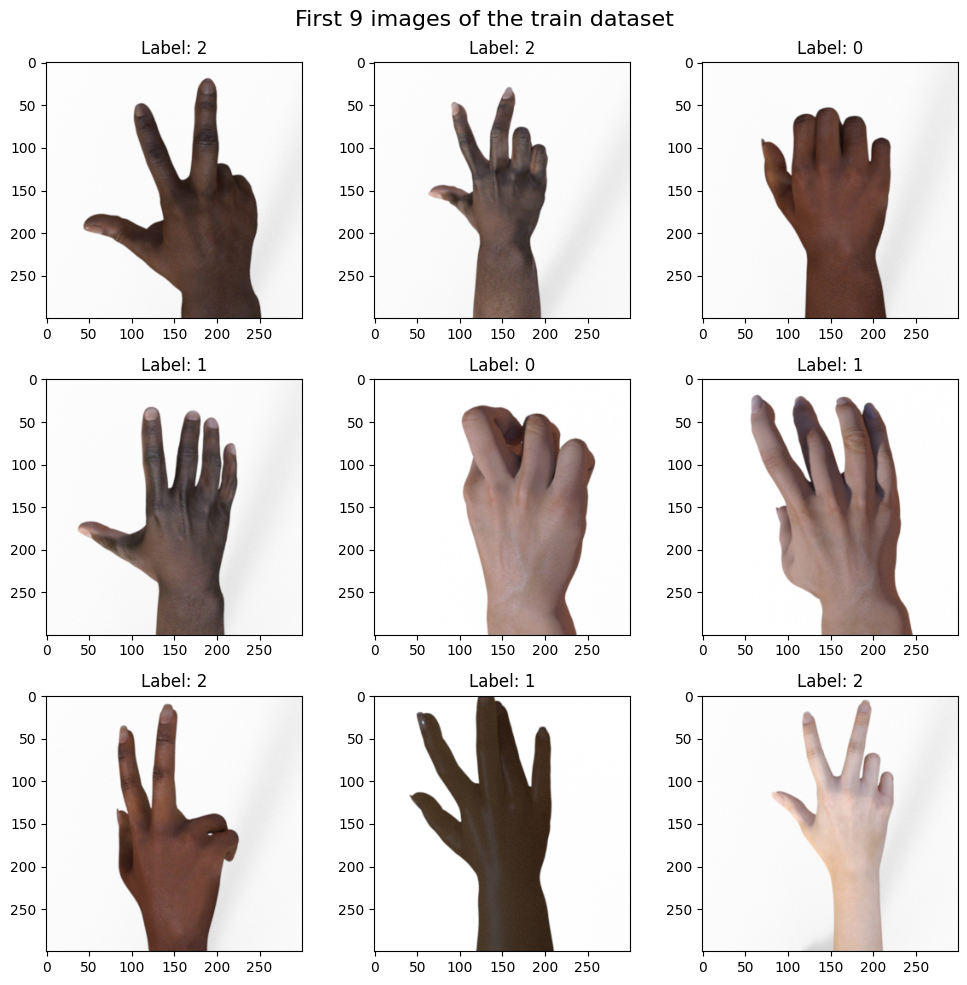

In [3]:
import matplotlib.pyplot as plt

# Hiển thị 9 ảnh và nhãn
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
fig.suptitle('First 9 images of the train dataset', fontsize = 16)
for i in range(9):
    axs[i].imshow(train_imgs[i])
    axs[i].set_title(f'Label: {train_labels[i]}')

plt.tight_layout()
plt.show()

### Ở đây tụi mình tiến hành luôn bước gia tăng dữ liệu như một cách để ôn bài cho phần trước đó nha.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Tiến hành gia tăng dữ liệu (image augmentation)
# Định nghĩa nhưng thao tác chỉnh ảnh bên trong
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

# Tiến hành gia tăng dữ liệu ảnh (image augmentation) cho tập huấn luyện
train_imgs_augmented = train_datagen.flow(
    train_imgs,
    train_labels,
    batch_size = 32
)

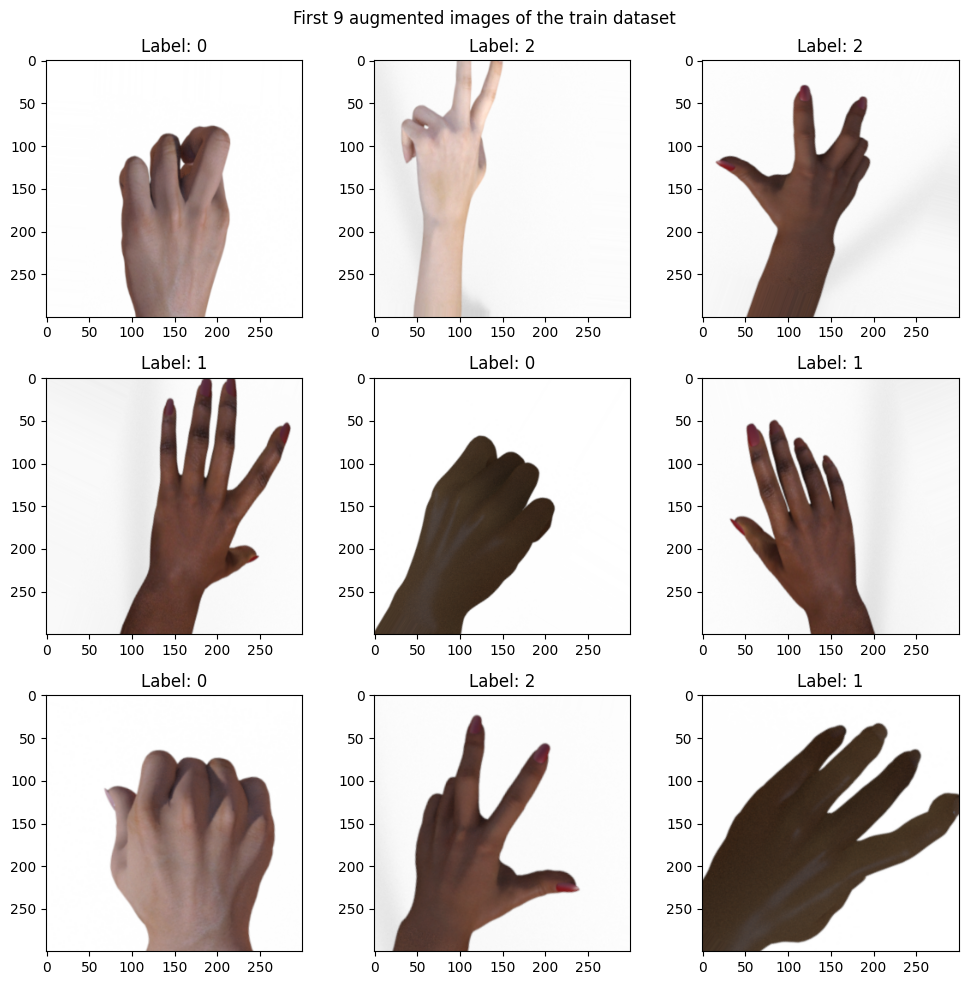

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
fig.suptitle('First 9 augmented images of the train dataset')
for i in range(9):
    axs[i].imshow(train_imgs_augmented[0][0][i])
    axs[i].set_title(f'Label: {train_imgs_augmented[0][1][i]}')

plt.tight_layout()
plt.show()

In [6]:
# Xây dựng kiến trúc mô hình
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(3, activation = "softmax") # Vì đây là phân loại đa lớp nên sử dụng softmax
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(train_imgs_augmented, epochs = 25,
          validation_data = (test_imgs, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 837ms/step - accuracy: 0.3618 - loss: 1.1671 - val_accuracy: 0.6801 - val_loss: 0.5868
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 53s 669ms/step - accuracy: 0.6215 - loss: 0.8375 - val_accuracy: 0.9731 - val_loss: 0.2364
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 654ms/step - accuracy: 0.8097 - loss: 0.4786 - val_accuracy: 0.9758 - val_loss: 0.1386
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 643ms/step - accuracy: 0.8794 - loss: 0.3307 - val_accuracy: 0.9758 - val_loss: 0.0902
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 52s 652ms/step - accuracy: 0.9109 - loss: 0.2414 - val_accuracy: 0.8898 - val_loss: 0.3199
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 644ms/step - accuracy: 0.9258 - loss: 0.2041 - val_accuracy: 0.9731 - val_loss: 0.0931
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 50s 625ms/step - accuracy: 0.9501 - loss: 0.1390 - val_accuracy: 0.9785 - val_loss: 0.0433
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 638ms/step - accuracy: 0.9614 - loss: 0.1184 - val_accu

In [8]:
# Kết quả đánh giá mô hình
result = model.evaluate(test_imgs, test_labels)
print(f'Test loss: {result[0]}')
print(f'Test accuracy: {result[1]}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 0.0123
Test loss: 0.013087469153106213
Test accuracy: 1.0


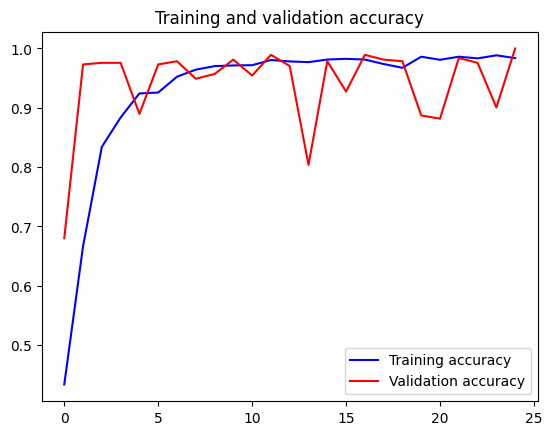

In [9]:
# Vẽ biểu đồ trong quá trình huấn luyện
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

### Vậy là tụi mình đã ôn tập xong phần phân loại đa nhãn rồi ha. Bây giờ chúng ta sẽ tìm hiểu về cơ chế loại bỏ ngẫu nhiên (dropout)

Mọi người cứ hiểu đơn giản trong quá trình học thì các dữ liệu sẽ đi qua tất cả các **neuron** (trong lớp tuyến tính - Dense và trong lớp tích chập - Conv), thông qua việc sử dụng **lớp loại bỏ ngẫu nhiên (dropout)** thì chúng ta sẽ tắt đi ngẫu nhiên một vài neuron khiến chúng không học.

Qua đó, kiến trúc mô hình có thể trở nên đơn giản hơn cũng như ta có thể giảm đi tỷ lệ quá khớp (overfitting) của mô hình.

![Drop out image](https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png)

Như mọi người có thể thấy ở hình minh họa trên, với bên trái là kiến trúc ban đầu và bên phải là khi sử dụng cơ chế loại bỏ ngẫu nhiên (dropout), các neuron bị đánh dấu "x" là bị loại bỏ đi. Qua đó, quá trình học tập hay truyền dữ liệu đã đơn giản hơn rất là nhiều rồi ha.

Bây giờ mình sẽ thử áp dụng xuống mô hình dưới đây với bộ dữ liệu [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) nha.

Tất nhiên là mọi người có thể linh hoạt thay đổi vị trí, thêm hoặc loại bỏ bớt các lớp dropout để xem xét kết quả ha. Miễn sao hợp lý là được.

### Thử nghiệm trên bộ dữ liệu Fashion Mnist

In [10]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()\

# Chuản hóa hình ảnh
train_images = train_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
# Định nghĩa mô hình trước khi thêm dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Định nghĩa hàm mất mát, hàm tối ưu
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # Mặc định learnig rate là 0.001

# Huấn luyện mô hình
history = model.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7825 - loss: 0.6150 - val_accuracy: 0.8356 - val_loss: 0.4489
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8640 - loss: 0.3687 - val_accuracy: 0.8570 - val_loss: 0.3882
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8812 - loss: 0.3226 - val_accuracy: 0.8698 - val_loss: 0.3563
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8847 - loss: 0.3092 - val_accuracy: 0.8741 - val_loss: 0.3568
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8920 - loss: 0.2909 - val_accuracy: 0.8809 - val_loss: 0.3324
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8982 - loss: 0.2715 - val_accuracy: 0.8785 - val_loss: 0.3271
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9040 - loss: 0.2539 - val_accuracy: 0.8763 - val_loss: 0.3428
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9065 - loss: 0.2505 -

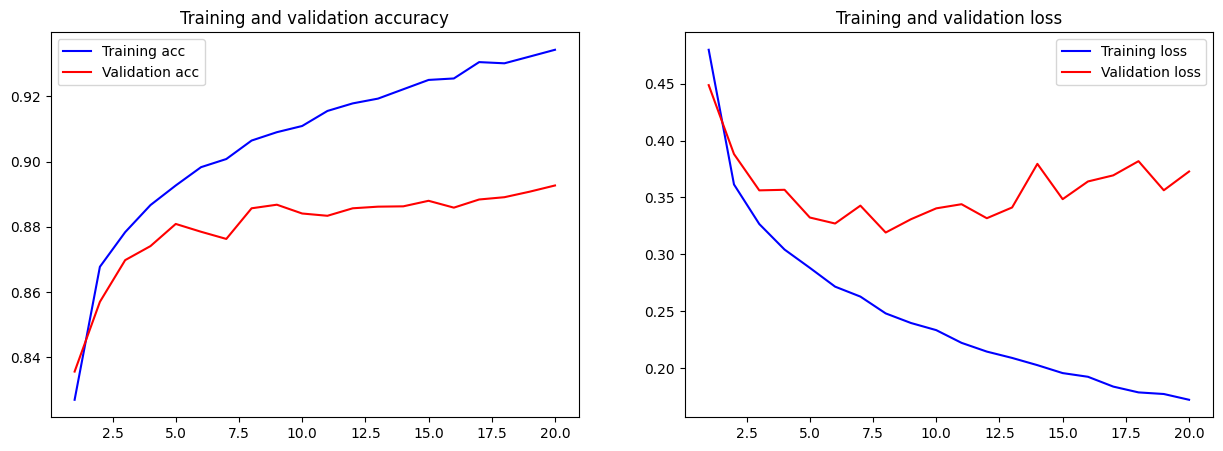

In [12]:
# Vẽ biểu đồ độ chính xác trên tập train và test
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

loss_acc = history.history['loss']
val_loss = history.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(epochs, train_acc, 'b', label = 'Training acc')
axs[0].plot(epochs, val_acc, 'r', label = 'Validation acc')
axs[0].set_title('Training and validation accuracy')
axs[0].legend()

axs[1].plot(epochs, loss_acc, 'b', label = 'Training loss')
axs[1].plot(epochs, val_loss, 'r', label = 'Validation loss')
axs[1].set_title('Training and validation loss')
axs[1].legend()

plt.show()

In [13]:
# Đánh giá mô hình trước khi thêm lớp dropout
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8917 - loss: 0.3896


[0.3728716969490051, 0.8927000164985657]

In [14]:
# Định nghĩa mô hình sau khi thêm dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Flatten, Dropout

model_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Định nghĩa hàm mất mát, hàm tối ưu
model_dropout.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # Mặc định learnig rate là 0.001

# Huấn luyện mô hình
history_dropout = model_dropout.fit(train_images, train_labels, epochs = 20, validation_data = (test_images, test_labels))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7180 - loss: 0.7846 - val_accuracy: 0.8436 - val_loss: 0.4330
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8402 - loss: 0.4447 - val_accuracy: 0.8439 - val_loss: 0.4259
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8547 - loss: 0.4029 - val_accuracy: 0.8565 - val_loss: 0.3913
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8646 - loss: 0.3780 - val_accuracy: 0.8644 - val_loss: 0.3688
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8698 - loss: 0.3611 - val_accuracy: 0.8702 - val_loss: 0.3585
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8755 - loss: 0.3449 - val_accuracy: 0.8756 - val_loss: 0.3574
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8797 - loss: 0.3374 - val_accuracy: 0.8753 - val_loss: 0.3507
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8823 - loss: 0.3256 

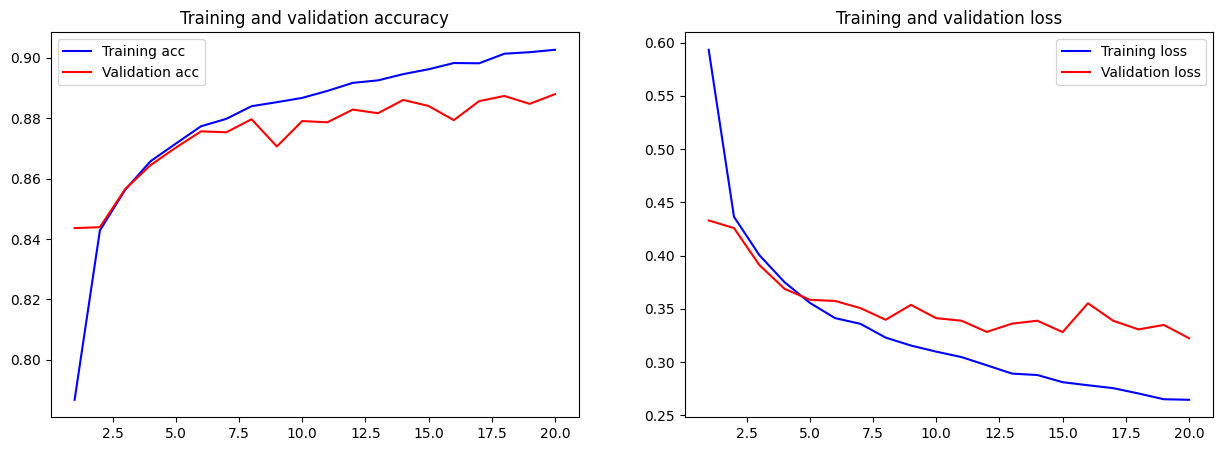

In [15]:
# Vẽ biểu đồ độ chính xác trên tập train và test
import matplotlib.pyplot as plt
train_acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

loss_acc = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(epochs, train_acc, 'b', label = 'Training acc')
axs[0].plot(epochs, val_acc, 'r', label = 'Validation acc')
axs[0].set_title('Training and validation accuracy')
axs[0].legend()

axs[1].plot(epochs, loss_acc, 'b', label = 'Training loss')
axs[1].plot(epochs, val_loss, 'r', label = 'Validation loss')
axs[1].set_title('Training and validation loss')
axs[1].legend()

plt.show()

In [16]:
# Đánh giá mô hình sau khi thêm lớp dropout
model_dropout.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.3263


[0.3224075138568878, 0.8878999948501587]

### Đây là kết quả so sánh trên 2 lần chạy trong phiên của mình nha.
- Trước khi thêm lớp dropout:
  - Tên tập train:
  > accuracy: 0.9372 - loss: 0.1658

  - Trên tập test:
  > accuracy: 0.8927 - loss: 0.3729
- Sau khi thêm lớp dropout:
  - Trên tập train:
  > accuracy: 0.9032 - loss: 0.2630
  
  - Trên tập test
  > accuracy: 0.8879 - loss: 0.3224


Bất ngờ đúng không mọi người, sau khi thêm các lớp dropout vào, dẫn đến mô hình ngẫu nhiên tắt đi một vài neuron, thì kết quả loss trên tập test đã tốt hơn một tí.

Giống như câu **"*Study Smarter, Not Harder*"** vậy.

Qua đó, ta có thể thấy được khả năng hạn chế **tình trạng quá khớp (overfitting)** của chúng, giúp mô hình có thể cải thiện nhẹ về khả năng khái quát hơn.

*Lưu ý: mọi người luôn phải nhớ rõ là mô hình hoạt động tốt trên tập dữ liệu huấn luyện không có nghĩa chúng là một mô hình tốt.*

# Cảm ơn mọi người rất nhiều

Vậy là hết chương 3 rồi á, cảm ơn mọi người đã theo dõi đến cuối. Mọi người là nguồn động lực rất lớn để mình có thể kiên trì thực hiện được như hôm nay.

Mình cũng chỉ là đang tự học hỏi thôi. Nếu có gì không đúng hoặc góp ý, mọi người có thể liên lạc với mình qua 2 phương thức trên nha.  
>Email: trinhhuynhthinhkhang.work@gmail.com  

>Fanpage Facebook: [Nhật ký học tập của Khang](https://www.facebook.com/profile.php?id=61565368375171)